In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 1. Loading in and cleaning IPEDS data

As we can see below, the tool I used on the IPEDS website to access the 2018–19 data a little clunky, and the data itself has a lot of categories and labels that don't totally match up. I creating the CSV I'm loading in I did the best I could within the time available to create relatively complete data, but a lot of cleaning will need to be done on the backend, as we'll see here.

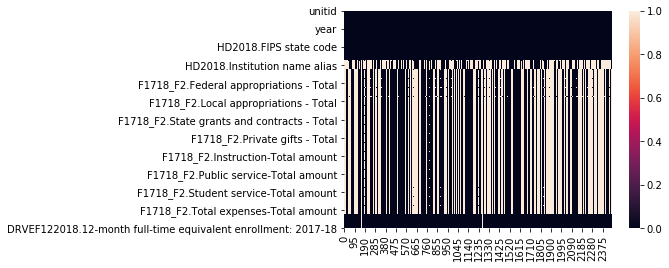

In [6]:
# Loading in data from my github
path = 'https://raw.githubusercontent.com/semblables/capstone_1/master/colleges_dataset.csv'
ipeds_data = pd.read_csv(path)
# Using Pandas transpose to make heatmap labels more readable
sns.heatmap(ipeds_data.transpose().isnull())

To determine which rows/institutions (columns in the above visualization) to drop, I created a lineplot showing the loss of information given a certain threshold of missing values in a given row for retention in the cleaned dataframe.

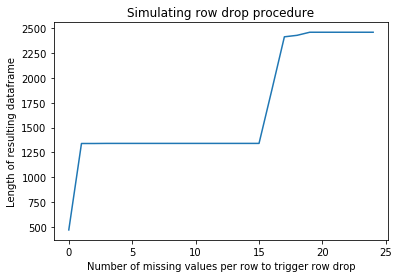

In [10]:
def drop_rows_lineplot(df):

    drop_trial = df.copy()

    # Checking out how the number of not-dropped rows increases as threshold of
    # null values increases.
    lengths_dropping = [len(drop_trial.dropna(thresh=i)) for i in range(25, 0, -1)]
    plt.plot(lengths_dropping)
    plt.title('Simulating row drop procedure')
    plt.xlabel('Number of missing values per row to trigger row drop')
    plt.ylabel('Length of resulting dataframe')
    plt.show()

drop_rows_lineplot(ipeds_data)

This line plot indicates to me, as suggested by the heat map, that a ton of information will be lost if rows with several missing values are dropped. I'll proceed by analyzing the other axis to see if there are particular columns that can be removed so that there are fewer rows with a large number of missing values.

First I'm just going to drop columns that aren't necessary for this project.

In [9]:
dropping_cols = ['year',
             'HD2018.Postsecondary and Title IV institution indicator',
             'HD2018.FIPS state code',
             'institution name.1',
             'HD2018.Institution name alias',
             'DRVEF122018.12-month unduplicated headcount, total: 2017-18'
             ]

keep_cols = ['unitid',
             'institution name',
             'F1718_F2.Tuition and fees - Total',
             'F1718_F2.Federal appropriations - Total',
             'F1718_F2.State appropriations - Total',
             'F1718_F2.Local appropriations - Total',
             'F1718_F2.Federal grants and contracts - Total',
             'F1718_F2.State grants and contracts - Total',
             'F1718_F2.Local grants and contracts - Total',
             'F1718_F2.Private gifts - Total',
             'F1718_F2.Total revenues and investment return - Total',
             'F1718_F2.Instruction-Total amount']

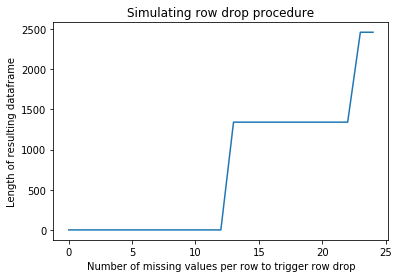

In [11]:
drop_rows_lineplot(ipeds_data[keep_cols])